In [188]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [142]:
# list past copies
!ls -lh | grep "DSP 461 Project"

# delete past copies uploaded
!rm -f DSP\ 461\ Project*.csv

-rw-r--r-- 1 root root 485K Nov 12 08:28 DSP 461 Project (1).csv
-rw-r--r-- 1 root root 1.4M Nov 12 08:04 DSP 461 Project.csv


In [144]:
from google.colab import files
uploaded = files.upload()


Saving DSP 461 Project.csv to DSP 461 Project.csv


#### Load in the Data

In [158]:
import pandas as pd

df = pd.read_csv("DSP 461 Project.csv")

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

### Clean the Data

In [165]:
# make new decoded df

df_decoded = df.copy()

#### Decoded Data using program created by ChatGPT

In [167]:
# === 1️⃣ Define decoding maps ===

decode_maps = {
    "Marital status": {
        1: "single", 2: "married", 3: "widower", 4: "divorced",
        5: "facto union", 6: "legally separated"
    },
    "Application mode": {
        1: "1st phase - general contingent",
        2: "Ordinance No. 612/93",
        5: "1st phase - special contingent (Azores Island)",
        7: "Holders of other higher courses",
        10: "Ordinance No. 854-B/99",
        15: "International student (bachelor)",
        16: "1st phase - special contingent (Madeira Island)",
        17: "2nd phase - general contingent",
        18: "3rd phase - general contingent",
        26: "Ordinance No. 533-A/99, item b2 (Different Plan)",
        27: "Ordinance No. 533-A/99, item b3 (Other Institution)",
        39: "Over 23 years old",
        42: "Transfer",
        43: "Change of course",
        44: "Technological specialization diploma holders",
        51: "Change of institution/course",
        53: "Short cycle diploma holders",
        57: "Change of institution/course (International)"
    },
    "Application order": {
        0: "first choice", 1: "second choice", 2: "third choice",
        3: "fourth choice", 4: "fifth choice", 5: "sixth choice",
        6: "seventh choice", 7: "eighth choice", 8: "ninth choice", 9: "tenth choice"
    },
    "Course": {
        33: "Biofuel Production Technologies",
        171: "Animation and Multimedia Design",
        8014: "Social Service (evening attendance)",
        9003: "Agronomy",
        9070: "Communication Design",
        9085: "Veterinary Nursing",
        9119: "Informatics Engineering",
        9130: "Equinculture",
        9147: "Management",
        9238: "Social Service",
        9254: "Tourism",
        9500: "Nursing",
        9556: "Oral Hygiene",
        9670: "Advertising and Marketing Management",
        9773: "Journalism and Communication",
        9853: "Basic Education",
        9991: "Management (evening attendance)"
    },
    "Daytime/evening attendance": {1: "daytime", 0: "evening"},
    "Previous qualification": {
        1: "Secondary education",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        42: "Professional higher technical course",
        43: "Higher education - master (2nd cycle)"
    },
    "Mother's qualification": {
        1: "Secondary education - 12th year",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        22: "Basic education 1st cycle",
        26: "Can’t read or write",
        27: "Can read without formal education",
        29: "Unknown",
        30: "Other",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        41: "Higher education - master (2nd cycle)",
        42: "Professional higher technical course"
    },
    "Father's qualification": {
        1: "Secondary education - 12th year",
        2: "Higher education - bachelor's degree",
        3: "Higher education - degree",
        4: "Higher education - master's",
        5: "Higher education - doctorate",
        6: "Frequency of higher education",
        9: "12th year not completed",
        10: "11th year not completed",
        12: "Other - 11th year schooling",
        14: "10th year schooling",
        15: "10th year not completed",
        19: "Basic education 3rd cycle",
        22: "Basic education 1st cycle",
        26: "Can’t read or write",
        27: "Can read without formal education",
        29: "Unknown",
        30: "Other",
        38: "Basic education 2nd cycle",
        39: "Technological specialization course",
        40: "Higher education - degree (1st cycle)",
        41: "Higher education - master (2nd cycle)",
        42: "Professional higher technical course"
    },
    "Mother's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power, Executive Bodies, Directors, Managers",
        2: "Specialists in intellectual and scientific activities",
        3: "Intermediate level technicians and professions",
        4: "Administrative staff",
        5: "Personal services, security, and safety workers and sellers",
        6: "Farmers and skilled workers in agriculture, fisheries, and forests",
        7: "Skilled workers in industry, construction, and craftsmen",
        8: "Machine operators and assembly workers",
        9: "Unskilled workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "Unknown"
    },
    "Father's occupation": {
        0: "Student", 1: "Representatives of the Legislative Power, Executive Bodies, Directors, Managers",
        2: "Specialists in intellectual and scientific activities",
        3: "Intermediate level technicians and professions",
        4: "Administrative staff",
        5: "Personal services, security, and safety workers and sellers",
        6: "Farmers and skilled workers in agriculture, fisheries, and forests",
        7: "Skilled workers in industry, construction, and craftsmen",
        8: "Machine operators and assembly workers",
        9: "Unskilled workers",
        10: "Armed Forces Professions",
        90: "Other Situation",
        99: "Unknown"
    },
    "Gender": {1: "male", 0: "female"}
}

# === 2️⃣ Apply categorical decodings directly to df ===
for col, mapping in decode_maps.items():
    if col in df_decoded.columns:
        df_decoded[col] = df_decoded[col].replace(mapping)

# === 3️⃣ Convert Yes/No numeric columns to booleans ===
bool_columns = [
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "International"
]

for col in bool_columns:
    if col in df_decoded.columns:
        df_decoded[col] = df_decoded[col].replace({1: True, 0: False}).astype(bool)

#### Translate the df and check that it worked

In [168]:
df_decoded.to_csv("DSP 461 Project.csv", index=False)
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   object 
 2   Application order                               4424 non-null   object 
 3   Course                                          4424 non-null   object 
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   object 
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   object 
 9   Father's qualification                   

In [ ]:
# Source - https://stackoverflow.com/a
# Posted by JohanC, modified by community. See post 'Timeline' for change history
# Retrieved 2025-11-12, License - CC BY-SA 4.0


def jitter_dots(dots):
    offsets = dots.get_offsets()
    jittered_offsets = offsets
    # only jitter in the x-direction
    jittered_offsets[:, 0] += np.random.uniform(-0.3, 0.3, offsets.shape[0])
    dots.set_offsets(jittered_offsets)

df_1 = pd.DataFrame({'Cells': np.arange(0, 100),
                     'Delta_7': np.random.rand(100),
                     'Delta_10': np.random.rand(100),
                     'Delta_14': np.random.rand(100)})
fig, ax1 = plt.subplots()

columns = df_1.columns[21:25]
c = df_1['Delta_7']
for i, column in enumerate(columns):
    dots = plt.scatter(np.full((len(df_1), 1), i), df_1[column], s=50, c=c, cmap='plasma')
    jitter_dots(dots)
plt.xticks(range(len(columns)), columns)
xmin, xmax = plt.xlim()
plt.xlim(xmin - 0.3, xmax + 0.3)  # make some room to show the jittered dots
# cbar = plt.colorbar()
plt.show()


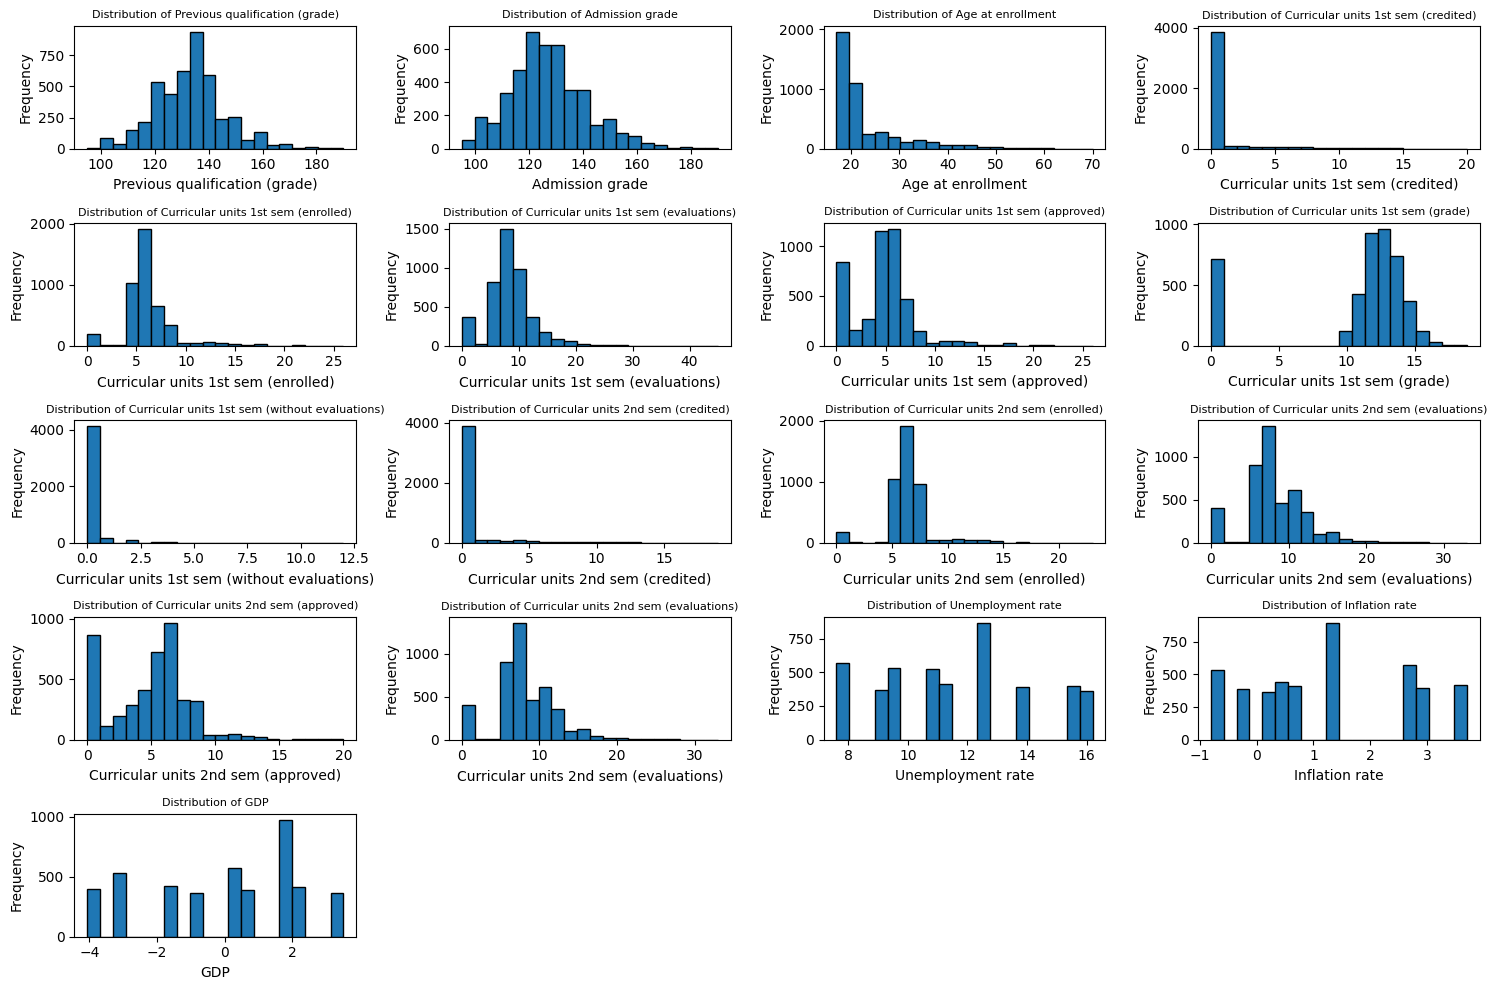

In [186]:
quantitative_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (grade evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
    ]

plt.figure(figsize=(15, 10))
i = -1
for col in quantitative_columns:
    if col in df.columns:
        i+=1
        plt.subplot(5, 4, i + 1)
        plt.hist(df[col], bins=20, edgecolor='k')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {col}", fontsize = 8)
plt.tight_layout()
plt.show()

In [ ]:
quantitative_columns = [
    "Previous qualification (grade)",
    "Admission grade",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (grade evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
    ]

plt.figure(figsize=(15, 10))
i = -1
for col in quantitative_columns:
    if col in df.columns:
        i+=1
        plt.subplot(5, 4, i + 1)
        plt.scatter(df[col], bins=20, edgecolor='k')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {col}", fontsize = 8)
plt.tight_layout()
plt.show()

### Visualizations of Variables With Target

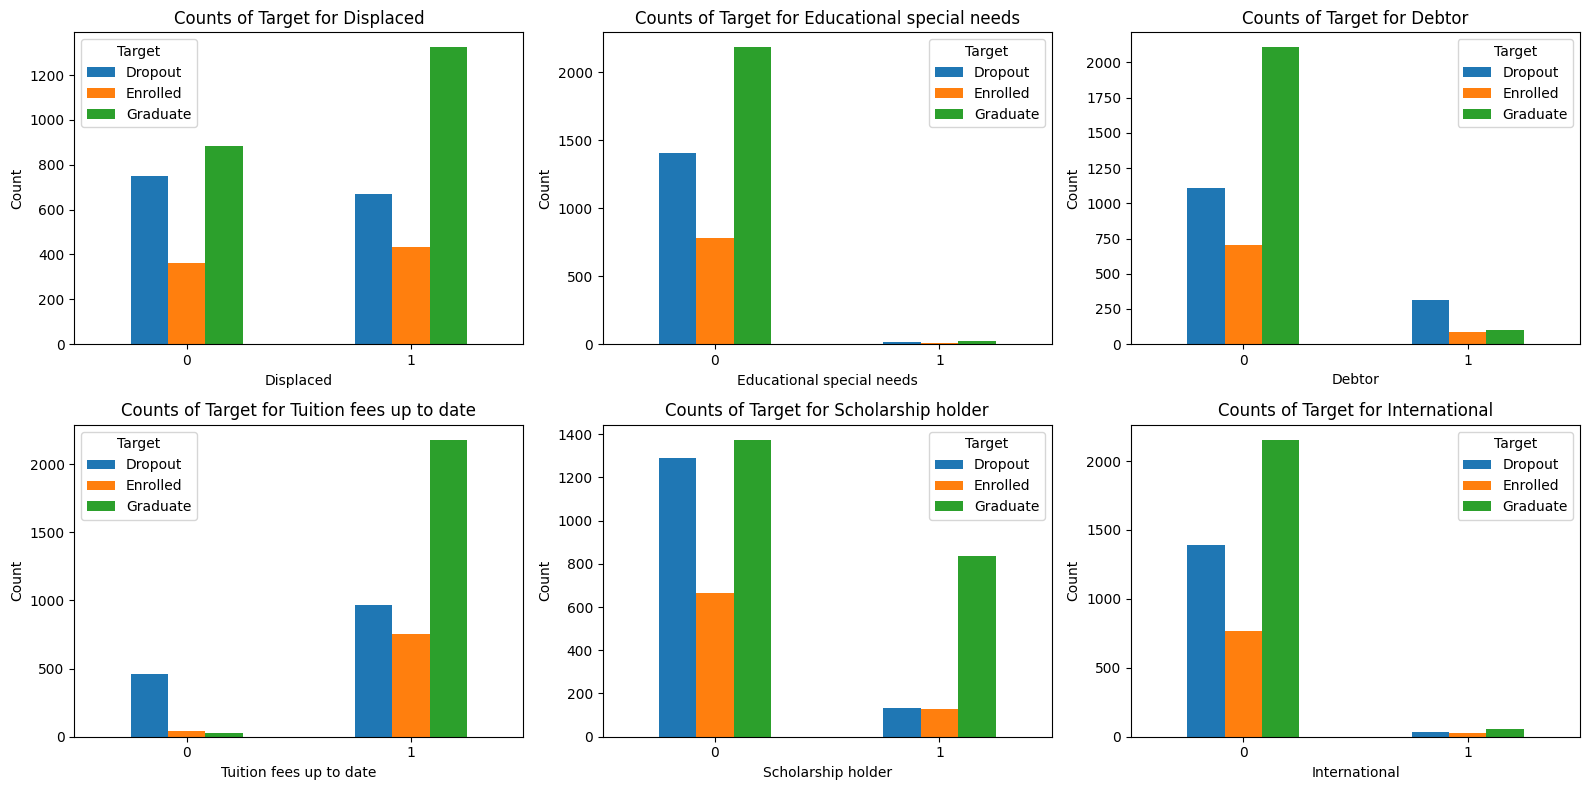

In [187]:
plt.figure(figsize=(16, 8))
i = -1
for col in bool_columns:
    if col in df.columns:
        i+=1
        plt.subplot(2, 3, i + 1)
        bool_col = col
        target_col = "Target"

        # Group by Displaced and Target, then count
        counts = df.groupby([bool_col, target_col]).size().unstack(fill_value=0)

        counts.plot(kind='bar', stacked=False, ax=plt.gca())

        plt.xlabel(bool_col)
        plt.ylabel("Count")
        plt.title(f"Counts of {target_col} for {bool_col}")
        plt.xticks(rotation=0)
        plt.legend(title=target_col)
plt.tight_layout()
plt.show()

### AdaBoost

In [191]:
# Load dataset
X = df.drop("Target", axis=1)  # drop target column


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df["Target"])

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



# Use a decision stump as base learner
base_learner = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(estimator=base_learner, n_estimators=10, random_state=42)

# Train
ada.fit(X_train, y_train)

# Evaluate
y_pred = ada.predict(X_test)
print("Library AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

Features shape: (4424, 36)
Labels shape: (4424,)
Library AdaBoost Accuracy: 0.7220338983050848


### Random Forest

In [193]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

accuracy_score(y_test, rf_y_pred)

0.7672316384180791

In [196]:
import random

In [202]:
M = X.shape[0].sum()
bootstrap_sample = random.choices(X, df["Target"], k=M)

# m = n = 0

# m += 1
# n
# for i in range(0,100)

AttributeError: 'int' object has no attribute 'sum'

### CV 5 Fold Decision Tree (not done and probably not necessary) code pulled from slides

In [ ]:
import random

def info_gain(data_X, data_y, att):
    return -entropy(data_y) + entropy(data_X[att])



def best_att(data_X, data_y, att_list):
    best_att = None
    best_ig = -1
    for att in att_list:
        ig = info_gain(data_X, data_y, att)
        if ig > best_ig:
            best_ig = ig
            best_att = att
    return best_att




def create_tree(tree, data_X, data_y, att_list, depth, max_depth):
    node_id = depth + random.randint(1,1000)
    #stop condition, then create a node with the majority label
    if data_y.nunique() == 1 or len(att_list) == 0 or depth == max_depth:
        tree.add_node(node_id, label = data_y.mode()[0])
    else:
        # select attribute with largest IG
        best = best_att(data_X, data_y, att_list)
        tree.add_node(node_id, label = best)
        new_atts = [x for x in att_list if x!= best]
        # create branches
        for val in data_X[best].unique():
            idx = data_X[best] == val
            if idx.shape[0]>0:
                id = create_tree(tree, data_X.loc[idx], data_y.loc[idx],
                             new_atts, depth+1, max_depth)
                tree.add_edge(node_id, id, label = val)
    return node_id